Starting probabilities for each slot:
 [0.54340494 0.27836939 0.42451759 0.84477613 0.00471886 0.12156912
 0.67074908 0.82585276 0.13670659 0.57509333]
	 As a histogram 


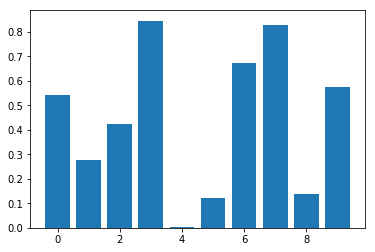

In [37]:
import numpy as np
import matplotlib.pyplot as plt

number_of_slot_machines = 10 #orig 500

np.random.seed(100)
winprobs =  np.random.uniform(0,1,number_of_slot_machines)
print('Starting probabilities for each slot:\n',winprobs)
print('\t As a histogram ')
plt.bar(np.arange(len(winprobs)),winprobs)
plt.show()


In [38]:
#known_winprobs = np.zeros(number_of_slot_machines)

#print(known_winprobs)

In [39]:

def play_machine(slot_machine):
   x = np.random.uniform(0, 1) 
   if (x <= winprobs[slot_machine]):
    return(10)
   else:
      return(-1)
    

In [40]:
print('quick check on one slot machine')
for machines in range(10):
     print(play_machine(3))

print ("------")        
#for machines in range(10):
#     print(play_machine(4))


quick check on one slot machine
-1
10
10
10
10
-1
10
10
10
10
------


In [41]:

#agent+strategy+environment+qfunction all reside here
def multi_armed_bandit(arms, iterations, epsilon):
    total_reward, optimal_slot2pull = [], []
    expvalue  = np.zeros(arms)
    playcount = np.zeros(arms)
    for i in range(0, iterations):
        epsilon_random = np.random.uniform(0, 1)
        if epsilon_random > epsilon :
            # exploit
            slot2pull = np.argmax(expvalue) 
        else :
            # explore
            slot2pull = np.random.choice(np.arange(arms))

        reward = play_machine(slot2pull)
        expvalue[slot2pull] = expvalue[slot2pull] + (1/(playcount[slot2pull]+1)) * (reward - expvalue[slot2pull])
        
        total_reward.append(reward)
        optimal_slot2pull.append(slot2pull == np.argmax(expvalue))
        playcount[slot2pull] += 1
        
    return(expvalue, total_reward)



Actual Odds


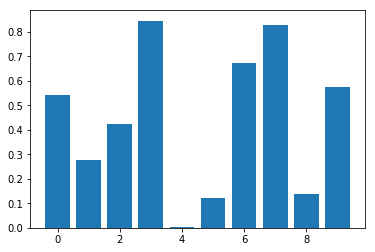

initial probabilities  [0.54340494 0.27836939 0.42451759 0.84477613 0.00471886 0.12156912
 0.67074908 0.82585276 0.13670659 0.57509333]
----------------------------------

----------------------------------
Learned Expected Value with epsilon of .1
----------------------------------


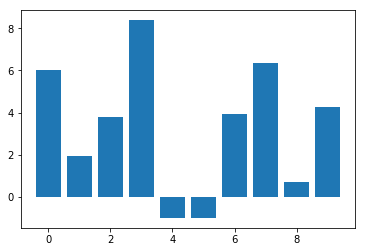

learned expected value array  [ 6.          1.93333333  3.7699115   8.3832021  -1.         -1.
  3.95        6.33333333  0.69230769  4.25      ]
Reward:  7228


In [42]:
print ("Actual Odds")
plt.bar(np.arange(len(winprobs)),winprobs)
plt.show()
print ('initial probabilities ', winprobs)
print("----------------------------------")

iterations = 1000
print("\n----------------------------------")
print ("Learned Expected Value with epsilon of .1")
print("----------------------------------")
learnedvalue, reward = multi_armed_bandit(number_of_slot_machines, iterations, .1)
plt.bar(np.arange(len(learnedvalue)),learnedvalue)
plt.show()
print ('learned expected value array ',learnedvalue)
print ("Reward: ", sum(reward))





----------------------------------
Learned Expected Value with epsilon of 0
----------------------------------


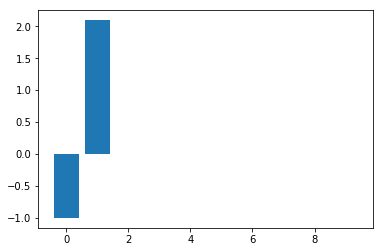

learned expected value array  [-1.          2.09409409  0.          0.          0.          0.
  0.          0.          0.          0.        ]
Reward:  2091


In [43]:

print("\n----------------------------------")
print ("Learned Expected Value with epsilon of 0")
print("----------------------------------")
learnedvalue, reward = multi_armed_bandit(number_of_slot_machines, iterations, 0)
plt.bar(np.arange(len(learnedvalue)),learnedvalue)
plt.show()
print ('learned expected value array ',learnedvalue)
print ("Reward: ", sum(reward))





----------------------------------
Learned Expected Value with epsilon of  0.15
----------------------------------


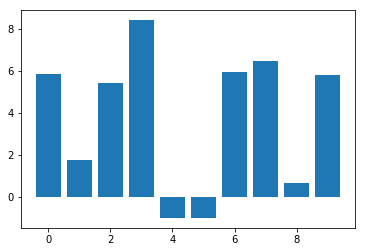

learned expected value array  [ 5.875       1.75        5.41666667  8.42092457 -1.         -1.
  5.96666667  6.5         0.65        5.80952381]
Reward:  7646


In [44]:
epsvalue = 0.15
print("\n----------------------------------")
print ("Learned Expected Value with epsilon of ",epsvalue)
print("----------------------------------")
learnedvalue, reward  = multi_armed_bandit(number_of_slot_machines, iterations, epsvalue)
plt.bar(np.arange(len(learnedvalue)),learnedvalue)
plt.show()
print ('learned expected value array ',learnedvalue)
print ("Reward: ", sum(reward))



----------------------------------
Learned Expected Value with epsilon of .01
----------------------------------


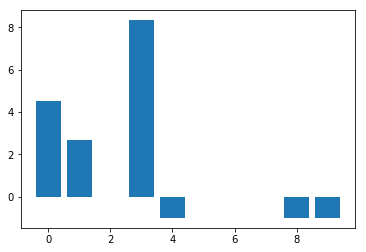

learned expected value array  [ 4.5         2.66666667  0.          8.32657201 -1.          0.
  0.          0.         -1.         -1.        ]
Reward:  8251


In [45]:
print("\n----------------------------------")
print ("Learned Expected Value with epsilon of .01")
print("----------------------------------")
learnedvalue, reward = multi_armed_bandit(number_of_slot_machines, iterations, .01)
plt.bar(np.arange(len(learnedvalue)),learnedvalue)
plt.show()
print ('learned expected value array ',learnedvalue)
print ("Reward: ", sum(reward))
